In [1]:
library(keras)
library(repr)

In [2]:
# Data Preparation 
# train and test sets
fashion <- dataset_fashion_mnist()
x_train <- fashion$train$x
y_train <- fashion$train$y
x_test <- fashion$test$x
y_test <- fashion$test$y

In [3]:
dim(x_train)

[1] 60000    28    28

In [4]:
dim(x_test)

[1] 10000    28    28

Lets take a look at image matrix of first image in training data  

In [5]:
x_test[1,,]

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,7,0,37,0,0
0,0,0,0,0,0,0,0,0,0,...,11,0,0,0,0,0,0,119,0,0
0,0,0,0,0,0,0,0,0,0,...,110,0,0,0,0,22,93,106,0,0
0,0,0,0,0,0,0,0,0,0,...,147,175,157,166,135,154,168,140,0,0


Label of the above first image.

In [6]:
paste("label of first image is:  " ,y_train[1])

[1] "label of first image is:   9"

Now we will define lable names as defined [here](https://keras.rstudio.com/reference/dataset_fashion_mnist.html#details)

In [7]:
label_names = c('T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat', 
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot')

In [8]:
options(repr.plot.width=5, repr.plot.height=3)

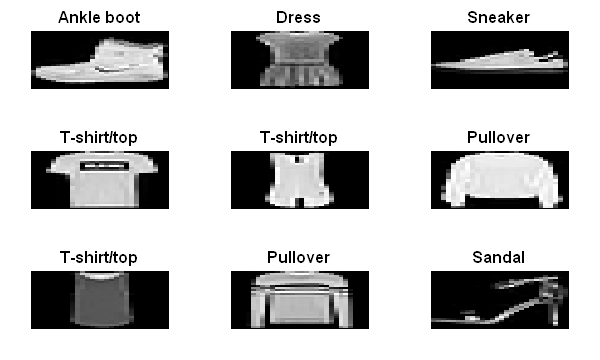

In [9]:
# visualize images
par(mfcol=c(3,3))
par(mar=c(2,2,2,2),xaxs = "i",yaxs = "i")
for (idx in 1:9) { 
  img <- x_train[idx,,]
  img <- t(apply(img, 2, rev)) 
  image(1:28,1:28,img, main=paste(label_names[y_train[idx]+1]),xaxt = 'n',yaxt = 'n',col= gray((0:255)/255))
}

In [10]:
# Redefine  dimension of train/test inputs
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), 28, 28, 1))

# Transform RGB values into [0,1] range
x_train <- x_train / 255
x_test <- x_test / 255


# Convert class vectors to binary class matrices
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

In [11]:
# Define model
cnn_model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 8, kernel_size = c(4,4), activation = 'relu',
                input_shape = c(28,28,1)) %>% 
  layer_conv_2d(filters = 16, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_flatten() %>% 
  layer_dense(units = 16, activation = 'relu') %>% 
  layer_dense(units = 10, activation = 'softmax')

In [12]:
cnn_model %>% summary()

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 25, 25, 8)               136         
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 23, 23, 16)              1168        
________________________________________________________________________________
flatten (Flatten)                   (None, 8464)                    0           
________________________________________________________________________________
dense (Dense)                       (None, 16)                      135440      
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      170         
Total params: 136,914
Trainable params: 136,914
Non-trainable params: 0
_____________________________________

In [25]:
loss_entropy <- function(y_pred, y_true) {
    loss_categorical_crossentropy(y_pred, y_true)
  }

In [26]:
# Compile model
cnn_model %>% compile(
  loss = loss_entropy,
  optimizer = optimizer_sgd(),
  metrics = c('accuracy')
)

In [27]:
# Train model
cnn_model %>% fit(
  x_train, y_train,
  batch_size = 128,
  epochs = 5,
  validation_split = 0.2
)

In [12]:
cnn_model %>% save_model_hdf5("cnn_model.h5")

In [10]:
# cnn_model <- load_model_hdf5("cnn_model.h5")

In [30]:
scores <- cnn_model %>% evaluate(x_test,
                                 y_test,
                                 verbose = 0
                                )

In [31]:
# Output metrics
paste('Test loss:', scores[[1]], '\n')
paste('Test accuracy:', scores[[2]], '\n')

[1] "Test loss: 0.537091252660751 \n"

[1] "Test accuracy: 0.816399991512299 \n"

In [33]:
#prediction
predicted_label <- cnn_model %>% predict_classes(x_test)